In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
import time
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
train_data = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/train.csv') 
train_data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
targeted_features = list(train_data.columns) 
targeted_features.remove('ID')
targeted_features.remove('y')
targeted_features

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

In [5]:
train_data[targeted_features].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [6]:
X_train = train_data[targeted_features]

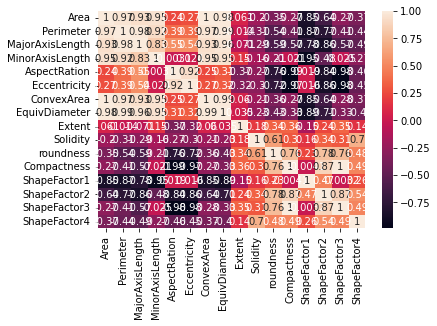

In [7]:
sn.heatmap(X_train.corr(), annot=True)
sn.set(rc = {'figure.figsize':(25,25)})

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSu

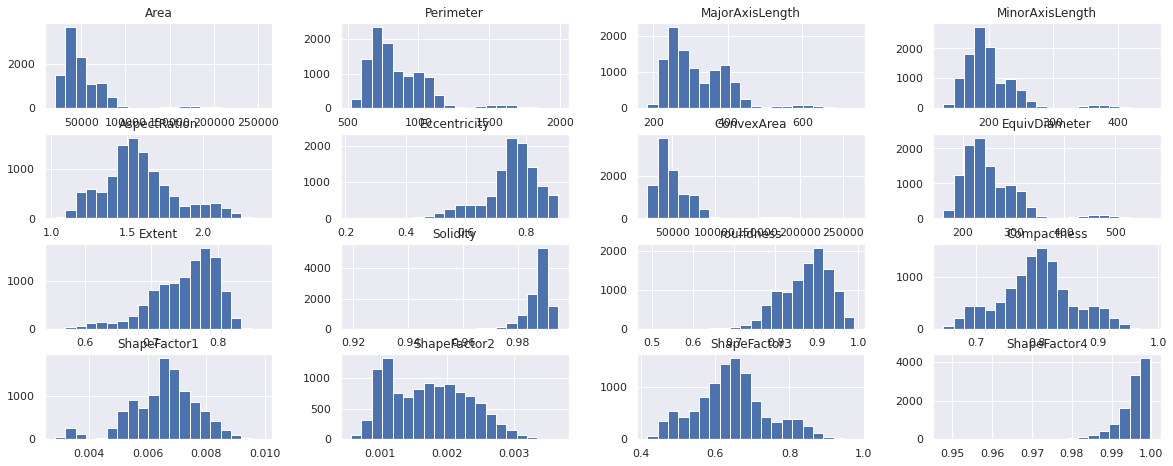

In [8]:
X_train.hist(figsize=(20,30), bins=20, layout=(15,4))

In [9]:
skew = pd.DataFrame(X_train.skew().sort_values(ascending=False))
skew

,0
Area,2.970246
ConvexArea,2.960315
MinorAxisLength,2.251468
EquivDiameter,1.971378
Perimeter,1.650773
MajorAxisLength,1.390286
AspectRation,0.589186
ShapeFactor2,0.292677
ShapeFactor3,0.245589
Compactness,0.038242


In [10]:
skewed = []
for s in list(skew.index):
    if abs(skew.loc[s,0]) > 0.5:
        skewed.append(s)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>],
       [<AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'Solidity'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <

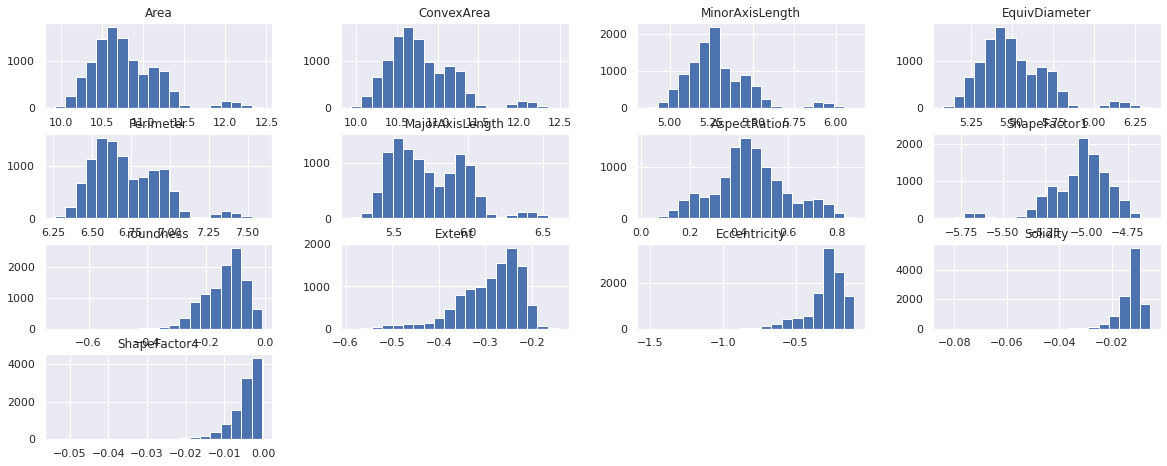

In [11]:
X_train_features = list(X_train.columns) 
for c in skewed:
    X_train_features.remove(c)
np.log(X_train[skewed]).hist(figsize=(20,30), bins=20, layout=(15,4))

In [12]:
#scaled_l = np.log(X_train[skewed])
#scaled_l = np.log(X_test[skewed])
scaler = RobustScaler()
boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)


scaled = scaler.fit_transform(X_train[X_train_features])
transformer1 = boxcoxTr.fit(X_train[skewed])
scaled_l = transformer1.transform(X_train[skewed])
scaled_l = pd.DataFrame(scaled_l,columns = skewed)
scaled = pd.DataFrame(scaled,columns = X_train_features)
X_train_transformed = pd.concat([scaled_l, scaled], axis=1)



In [13]:
X_train_transformed.describe() 

,Area,ConvexArea,MinorAxisLength,EquivDiameter,Perimeter,MajorAxisLength,AspectRation,ShapeFactor1,roundness,Extent,Eccentricity,Solidity,ShapeFactor4,Compactness,ShapeFactor2,ShapeFactor3
count,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,10834.000000,10834.000000
mean,-2.781372e-12,-2.435394e-12,4.642838e-12,2.288612e-12,4.338800e-13,-1.976101e-13,-1.128054e-16,2.624714e-12,-2.124939e-16,-9.181833e-18,-1.574029e-17,-1.479587e-15,8.493196e-17,-1.674947e-02,0.017106,0.016402
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,8.661522e-01,0.588283,0.870216
min,-3.127594e+00,-3.119487e+00,-3.602541e+00,-3.127594e+00,-2.942758e+00,-2.918674e+00,-3.015021e+00,-2.624619e+00,-3.301156e+00,-2.450473e+00,-2.621188e+00,-2.497075e+00,-2.222295e+00,-2.207674e+00,-1.126378,-1.999474
25%,-6.644276e-01,-6.690428e-01,-6.043729e-01,-6.644276e-01,-7.434278e-01,-8.252256e-01,-5.530537e-01,-6.683957e-01,-7.736688e-01,-7.933817e-01,-5.641757e-01,-6.730827e-01,-7.614570e-01,-5.382621e-01,-0.535092,-0.527264
50%,-3.284877e-02,-3.634326e-02,-6.900763e-04,-3.284876e-02,-7.412183e-02,-5.737401e-02,-2.084575e-02,-4.665925e-04,5.693451e-02,6.360315e-02,7.361969e-04,5.933825e-02,1.170032e-01,7.852758e-16,0.000000,0.000000
75%,7.529325e-01,7.573591e-01,6.660152e-01,7.529325e-01,8.344699e-01,8.782006e-01,5.881771e-01,6.043329e-01,7.112553e-01,7.611044e-01,6.259795e-01,6.819343e-01,8.120900e-01,4.617379e-01,0.464908,0.472736
max,2.571150e+00,2.576113e+00,2.623138e+00,2.571150e+00,2.524702e+00,2.486473e+00,2.602412e+00,3.659998e+00,2.482065e+00,3.696755e+00,2.360126e+00,3.224797e+00,1.949530e+00,2.629433e+00,1.947744,2.944292


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>],
       [<AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'Solidity'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSu

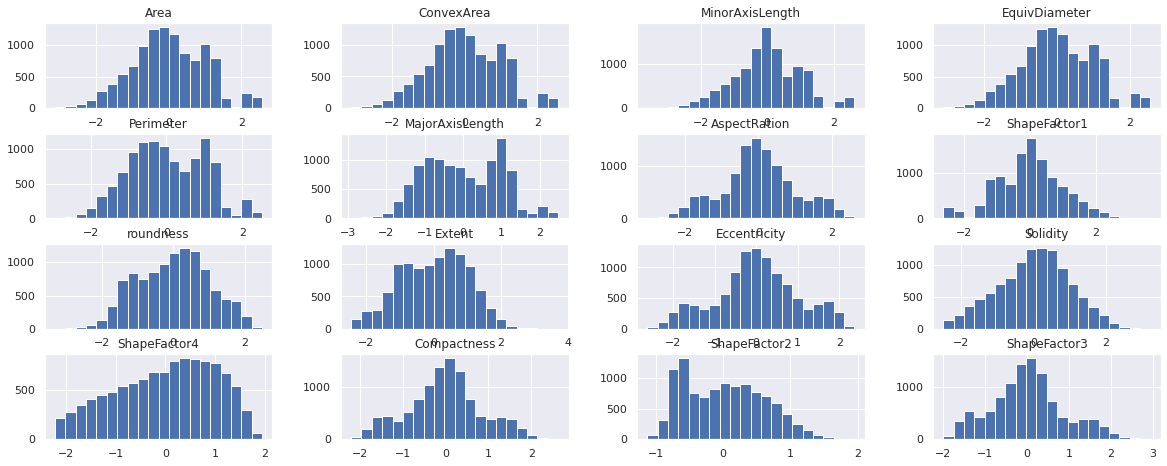

In [14]:
X_train_transformed.hist(figsize=(20,30), bins=20, layout=(15,4))

In [15]:
X_train_transformed.describe()

,Area,ConvexArea,MinorAxisLength,EquivDiameter,Perimeter,MajorAxisLength,AspectRation,ShapeFactor1,roundness,Extent,Eccentricity,Solidity,ShapeFactor4,Compactness,ShapeFactor2,ShapeFactor3
count,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,1.083400e+04,10834.000000,10834.000000
mean,-2.781372e-12,-2.435394e-12,4.642838e-12,2.288612e-12,4.338800e-13,-1.976101e-13,-1.128054e-16,2.624714e-12,-2.124939e-16,-9.181833e-18,-1.574029e-17,-1.479587e-15,8.493196e-17,-1.674947e-02,0.017106,0.016402
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,8.661522e-01,0.588283,0.870216
min,-3.127594e+00,-3.119487e+00,-3.602541e+00,-3.127594e+00,-2.942758e+00,-2.918674e+00,-3.015021e+00,-2.624619e+00,-3.301156e+00,-2.450473e+00,-2.621188e+00,-2.497075e+00,-2.222295e+00,-2.207674e+00,-1.126378,-1.999474
25%,-6.644276e-01,-6.690428e-01,-6.043729e-01,-6.644276e-01,-7.434278e-01,-8.252256e-01,-5.530537e-01,-6.683957e-01,-7.736688e-01,-7.933817e-01,-5.641757e-01,-6.730827e-01,-7.614570e-01,-5.382621e-01,-0.535092,-0.527264
50%,-3.284877e-02,-3.634326e-02,-6.900763e-04,-3.284876e-02,-7.412183e-02,-5.737401e-02,-2.084575e-02,-4.665925e-04,5.693451e-02,6.360315e-02,7.361969e-04,5.933825e-02,1.170032e-01,7.852758e-16,0.000000,0.000000
75%,7.529325e-01,7.573591e-01,6.660152e-01,7.529325e-01,8.344699e-01,8.782006e-01,5.881771e-01,6.043329e-01,7.112553e-01,7.611044e-01,6.259795e-01,6.819343e-01,8.120900e-01,4.617379e-01,0.464908,0.472736
max,2.571150e+00,2.576113e+00,2.623138e+00,2.571150e+00,2.524702e+00,2.486473e+00,2.602412e+00,3.659998e+00,2.482065e+00,3.696755e+00,2.360126e+00,3.224797e+00,1.949530e+00,2.629433e+00,1.947744,2.944292


In [16]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  float64
 1   ConvexArea       10834 non-null  float64
 2   MinorAxisLength  10834 non-null  float64
 3   EquivDiameter    10834 non-null  float64
 4   Perimeter        10834 non-null  float64
 5   MajorAxisLength  10834 non-null  float64
 6   AspectRation     10834 non-null  float64
 7   ShapeFactor1     10834 non-null  float64
 8   roundness        10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Eccentricity     10834 non-null  float64
 11  Solidity         10834 non-null  float64
 12  ShapeFactor4     10834 non-null  float64
 13  Compactness      10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
dtypes: float64(16)
memory usage: 1.3 MB


In [17]:
X_train_transformed.duplicated()[(X_train_transformed.duplicated() == True)]

Series([], dtype: bool)

In [18]:
train_y = train_data[['y']]

In [19]:
train_y.value_counts()

y       
DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
dtype: int64

In [20]:
label_encoder = preprocessing.LabelEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
y_encoded_train = label_encoder.fit_transform(train_y)
y_encoded_train = pd.DataFrame(y_encoded_train)
y_encoded_train.value_counts()

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3    2837
6    2109
5    1621
4    1488
2    1304
0    1057
1     418
dtype: int64

In [21]:
pca = PCA().fit(X_train_transformed)
X_train_transformed = pca.transform(X_train_transformed)
print(pca.explained_variance_ratio_)

[5.92190671e-01 2.45028701e-01 6.98149073e-02 5.78174292e-02
 2.71328915e-02 6.58644905e-03 9.14119449e-04 3.71241219e-04
 5.38468962e-05 4.69942208e-05 3.24166474e-05 8.49088467e-06
 1.05221133e-06 4.68933647e-07 3.20850041e-07 4.00279631e-20]


In [22]:
X_train_transformed = pd.DataFrame(X_train_transformed[:,:15])

In [23]:
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-3.130611,-2.514651,-0.871964,-2.278586,1.485130,-0.302092,-0.103509,0.093677,0.021888,-0.030558,-0.012789,0.001787,-0.000761,-0.000287,0.003406
1,2.673735,3.355934,-1.420872,-0.786132,-1.344043,0.411875,0.089358,0.071130,-0.009699,-0.025564,0.024794,-0.001831,-0.000136,0.003323,0.001614
2,3.384680,-0.321911,-0.213683,1.106841,0.226526,-0.351137,-0.036755,-0.022813,0.002818,-0.016667,-0.006034,-0.004494,-0.001334,0.000387,0.000322
3,1.862278,0.363567,-0.438848,-0.308771,1.012302,-0.285340,-0.025953,-0.048971,-0.010534,-0.015527,0.008896,0.007205,0.000749,-0.001935,0.000853
4,0.792620,0.365085,0.446245,-0.590895,-0.107892,0.150153,-0.010033,-0.050658,-0.022386,-0.011161,0.003560,-0.005345,0.000680,-0.000656,-0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,2.709300,1.550427,0.286070,-0.030713,-0.017381,0.152362,-0.057757,0.015064,-0.011664,-0.032399,-0.007922,-0.003881,0.001871,-0.000476,-0.000944
10830,2.712862,-1.266799,0.298548,-0.378634,0.169819,-0.229146,0.013928,-0.049081,0.003070,0.001596,-0.002963,-0.002364,-0.000698,0.000243,0.001161
10831,-3.539610,0.861748,-1.767937,-0.188115,-0.474879,0.244370,-0.156359,-0.060217,0.021551,0.015040,0.004708,0.001453,-0.002350,0.003702,-0.000892
10832,-0.489641,-0.044222,0.486397,-1.237707,-0.705870,-0.004758,0.005489,-0.047917,-0.022516,0.008479,0.011787,-0.007183,0.000174,-0.000027,-0.000564


In [24]:
X_train = X_train_transformed
y_train = y_encoded_train

In [25]:
test_data = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/test.csv')
test_data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

In [27]:
targeted_features_test = list(test_data.columns) 
targeted_features_test.remove('ID')

In [28]:
X_test = test_data[targeted_features_test]

In [29]:
#scaled = scaler.transform(X_test[X_train_features])
#scaled_l = np.log(X_test[skewed])
#scaled = pd.DataFrame(scaled,columns = X_train_features)
#scaled_l = pd.DataFrame(scaled_l,columns = skewed)
#X_test_transformed = pd.concat([scaled_l, scaled], axis=1)

scaled = scaler.transform(X_test[X_train_features])
scaled_l = transformer1.transform(X_test[skewed])
scaled = pd.DataFrame(scaled,columns = X_train_features)
scaled_l = pd.DataFrame(scaled_l,columns = skewed)
X_test_transformed = pd.concat([scaled_l, scaled], axis=1)

In [30]:
X_test_transformed.duplicated()[(X_test_transformed.duplicated() == True)]

Series([], dtype: bool)

In [31]:
X_test_transformed

,Area,ConvexArea,MinorAxisLength,EquivDiameter,Perimeter,MajorAxisLength,AspectRation,ShapeFactor1,roundness,Extent,Eccentricity,Solidity,ShapeFactor4,Compactness,ShapeFactor2,ShapeFactor3
0,0.616869,0.683605,0.126396,0.616869,0.754479,0.981016,1.495793,0.076135,-1.321206,-2.031323,1.480434,-2.445381,-2.216411,-1.452366,-0.705225,-1.363941
1,-1.524261,-1.521724,-1.380747,-1.524261,-1.462907,-1.377643,-0.515087,1.366260,0.567715,0.242309,-0.523674,-0.090909,0.844118,0.435358,0.658999,0.445220
2,0.493021,0.512761,0.859449,0.493021,0.562247,0.123386,-0.893361,-0.865147,-0.856811,-0.102154,-0.926013,-1.726885,-0.182878,0.747768,0.154199,0.775044
3,-2.158753,-2.157396,-2.102358,-2.158753,-2.111773,-1.822287,-0.475598,2.082847,1.055187,-0.833569,-0.481552,0.061332,1.204287,0.405115,0.819016,0.413749
4,2.066907,2.060650,2.197507,2.066907,1.954855,1.825923,-0.184484,-2.199426,-0.214135,1.296794,-0.171903,-0.252430,-1.171025,0.115685,-0.713419,0.116669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,0.934051,0.934847,0.597649,0.934051,0.992309,1.084967,1.166692,-0.581252,-1.110017,0.050838,1.183264,-0.602370,-1.224570,-1.030948,-0.653489,-0.987406
2705,-0.313250,-0.325951,0.402514,-0.313250,-0.563512,-0.884922,-1.726899,-0.418757,1.913933,0.242830,-1.767172,1.577287,0.826495,1.487018,0.866641,1.589905
2706,0.750488,0.813181,0.207726,0.750488,0.957052,1.145911,1.719213,0.022293,-1.752835,-2.105031,1.673195,-2.444306,-2.220207,-1.661958,-0.793464,-1.545357
2707,-0.868594,-0.860886,-0.822539,-0.868594,-0.784610,-0.776426,-0.255354,0.812511,0.011017,-0.681887,-0.247058,-0.583671,0.496992,0.207969,0.341546,0.210587


In [32]:
X_test_transformed.describe()

,Area,ConvexArea,MinorAxisLength,EquivDiameter,Perimeter,MajorAxisLength,AspectRation,ShapeFactor1,roundness,Extent,Eccentricity,Solidity,ShapeFactor4,Compactness,ShapeFactor2,ShapeFactor3
count,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000,2709.000000
mean,-0.011724,-0.011708,-0.009689,-0.011724,-0.011641,-0.012099,-0.008793,0.009966,0.003551,-0.012380,-0.009735,0.004835,-0.000637,-0.009123,0.025292,0.025328
std,1.016388,1.016425,1.018316,1.016388,1.016826,1.014625,1.019464,1.018355,1.009479,0.999450,1.019038,0.992192,0.986046,0.882845,0.598610,0.887261
min,-3.094138,-3.083186,-4.362553,-3.094138,-2.946191,-2.903319,-2.927049,-2.658904,-3.026176,-2.354220,-2.596047,-2.489574,-2.222086,-2.275448,-1.089176,-2.054032
25%,-0.682841,-0.689794,-0.627333,-0.682841,-0.770344,-0.865291,-0.589207,-0.653691,-0.782989,-0.798120,-0.602738,-0.618589,-0.735405,-0.546018,-0.544160,-0.534674
50%,-0.048577,-0.045404,-0.005715,-0.048577,-0.066735,-0.035073,-0.031914,0.002429,0.058254,0.027036,-0.010895,0.054834,0.112810,0.008267,0.000383,0.008298
75%,0.764590,0.768278,0.641407,0.764590,0.848936,0.883943,0.602815,0.619151,0.720612,0.754833,0.640574,0.689278,0.788728,0.484482,0.485026,0.496510
max,2.503372,2.491519,2.648276,2.503371,2.419390,2.431279,2.697440,4.407043,2.327338,2.659483,2.426765,3.013425,1.931374,2.548915,1.703672,2.845050


In [33]:
X_test_transformed = pca.transform(X_test_transformed)
print(pca.explained_variance_ratio_)

[5.92190671e-01 2.45028701e-01 6.98149073e-02 5.78174292e-02
 2.71328915e-02 6.58644905e-03 9.14119449e-04 3.71241219e-04
 5.38468962e-05 4.69942208e-05 3.24166474e-05 8.49088467e-06
 1.05221133e-06 4.68933647e-07 3.20850041e-07 4.00279631e-20]


In [34]:
X_test_transformed = pd.DataFrame(X_test_transformed[:,:15])

In [35]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import AgglomerativeClustering
"""
linkages = ['ward', 'complete', 'average', 'single']
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
num_clusters = [7]
scores = []
best_score = 0
best_model = {}
for c in num_clusters:
    for l in linkages:
        if l == 'ward':
            model = AgglomerativeClustering(affinity='euclidean',n_clusters = c,linkage='ward')#,distance_threshold=100,n_clusters = 10)
            clustering = model.fit(X_train)
            labels = clustering.labels_
            score = silhouette_score(X_train, labels)
            scores.append(score)
            if score > best_score:
                best_score = score
                best_model['num_clusters'] = c
                best_model['linkage'] = l
                best_model['affinity'] = 'euclidean'
                best_model['score'] = score
            pass 
        else:
            for a in affinities:
                model = AgglomerativeClustering(affinity= a,n_clusters = c ,linkage= l)
                clustering = model.fit(X_train)
                labels = clustering.labels_
                score = silhouette_score(X_train, labels)
                scores.append(score)
                if score > best_score:
                    best_score = score
                    best_model['num_clusters'] = c
                    best_model['linkage'] = l
                    best_model['affinity'] = a
                    best_model['score'] = score
"""

"\nlinkages = ['ward', 'complete', 'average', 'single']\naffinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']\nnum_clusters = [7]\nscores = []\nbest_score = 0\nbest_model = {}\nfor c in num_clusters:\n    for l in linkages:\n        if l == 'ward':\n            model = AgglomerativeClustering(affinity='euclidean',n_clusters = c,linkage='ward')#,distance_threshold=100,n_clusters = 10)\n            clustering = model.fit(X_train)\n            labels = clustering.labels_\n            score = silhouette_score(X_train, labels)\n            scores.append(score)\n            if score > best_score:\n                best_score = score\n                best_model['num_clusters'] = c\n                best_model['linkage'] = l\n                best_model['affinity'] = 'euclidean'\n                best_model['score'] = score\n            pass \n        else:\n            for a in affinities:\n                model = AgglomerativeClustering(affinity= a,n_clusters = c ,linkage= l)\n         

In [36]:
#best_model

In [37]:
best_model = {'num_clusters': 7,
 'linkage': 'ward',
 'affinity': 'euclidean'}

In [38]:
model = AgglomerativeClustering(affinity= best_model['affinity'],n_clusters = 7 ,linkage= best_model['linkage'])
clustering = model.fit(X_train)
y_pred_k = clustering.labels_

In [39]:
y_pred_k = pd.DataFrame({'y_pred_k':y_pred_k})

In [40]:
result_x_train = pd.concat([X_train, y_pred_k],axis=1, ignore_index=True)
result_x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.130611,-2.514651,-0.871964,-2.278586,1.485130,-0.302092,-0.103509,0.093677,0.021888,-0.030558,-0.012789,0.001787,-0.000761,-0.000287,0.003406,1
1,2.673735,3.355934,-1.420872,-0.786132,-1.344043,0.411875,0.089358,0.071130,-0.009699,-0.025564,0.024794,-0.001831,-0.000136,0.003323,0.001614,2
2,3.384680,-0.321911,-0.213683,1.106841,0.226526,-0.351137,-0.036755,-0.022813,0.002818,-0.016667,-0.006034,-0.004494,-0.001334,0.000387,0.000322,4
3,1.862278,0.363567,-0.438848,-0.308771,1.012302,-0.285340,-0.025953,-0.048971,-0.010534,-0.015527,0.008896,0.007205,0.000749,-0.001935,0.000853,0
4,0.792620,0.365085,0.446245,-0.590895,-0.107892,0.150153,-0.010033,-0.050658,-0.022386,-0.011161,0.003560,-0.005345,0.000680,-0.000656,-0.000186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,2.709300,1.550427,0.286070,-0.030713,-0.017381,0.152362,-0.057757,0.015064,-0.011664,-0.032399,-0.007922,-0.003881,0.001871,-0.000476,-0.000944,2
10830,2.712862,-1.266799,0.298548,-0.378634,0.169819,-0.229146,0.013928,-0.049081,0.003070,0.001596,-0.002963,-0.002364,-0.000698,0.000243,0.001161,4
10831,-3.539610,0.861748,-1.767937,-0.188115,-0.474879,0.244370,-0.156359,-0.060217,0.021551,0.015040,0.004708,0.001453,-0.002350,0.003702,-0.000892,3
10832,-0.489641,-0.044222,0.486397,-1.237707,-0.705870,-0.004758,0.005489,-0.047917,-0.022516,0.008479,0.011787,-0.007183,0.000174,-0.000027,-0.000564,0


In [41]:
clustering = model.fit(X_test_transformed)
y_pred_k_test = clustering.labels_
y_pred_k_test = pd.DataFrame({'y_pred_k_test':y_pred_k_test})
result_x_test = pd.concat([X_test_transformed, y_pred_k_test],axis=1)
result_x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,y_pred_k_test
0,-3.962535,-2.736434,2.041327,-0.512712,-0.735816,-0.518545,-0.064789,0.073983,-0.021492,-0.075179,0.007313,0.131461,-0.009879,0.003070,0.000712,0
1,3.875263,-1.341740,0.270718,0.404439,0.386885,-0.073789,-0.030477,-0.058736,0.024310,-0.011301,-0.013291,-0.001454,-0.000479,-0.000357,0.001422,3
2,-0.828706,1.645336,2.253190,0.245572,0.736420,0.281488,0.080615,0.005777,-0.043774,-0.023832,-0.017988,-0.010742,-0.000780,0.005640,-0.000379,6
3,5.335197,-2.482509,0.356983,-0.529335,0.187326,-0.364607,0.023944,-0.071568,0.051749,-0.002067,-0.036808,0.003160,-0.000671,0.001385,0.001994,3
4,-4.464626,3.508267,-0.035685,0.936321,-0.423227,-0.073876,0.307055,-0.018709,0.036999,-0.005901,-0.020027,-0.005881,0.002753,-0.000060,-0.000121,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,-3.612743,-0.720169,-0.094123,0.411704,-0.205501,0.064500,-0.156402,0.000296,0.003106,0.014495,-0.005299,-0.005653,-0.003007,-0.001037,0.001160,4
2705,3.201685,2.999267,-0.319251,-0.560570,-0.721140,0.035549,0.015422,0.114806,-0.002661,-0.010502,0.012443,-0.003350,-0.000003,0.000404,0.000409,2
2706,-4.557562,-2.940272,1.953066,-0.591066,-0.539919,-0.315088,-0.113878,0.079909,-0.006042,-0.108276,0.006375,0.153502,-0.009960,-0.007275,0.003800,0
2707,1.957550,-1.159883,0.844435,-0.352770,0.393230,-0.075952,-0.002790,-0.048959,0.000592,-0.000378,0.005478,-0.004915,-0.000690,0.000354,0.000977,3


In [42]:
result_x_test.rename(columns={'y_pred_k_test': 15},
          inplace=True, errors='raise')

# LGB

In [43]:
lgb_model = LGBMClassifier(objective='multiclass', random_state=12, boosting_type ='gbdt', learning_rate=0.1, n_estimators= 50,max_depth=5,min_child_weight=3)
lgb_model.fit(result_x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(max_depth=5, min_child_weight=3, n_estimators=50,
               objective='multiclass', random_state=12)

In [44]:
"""
lgb_model2 = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
lgb_model2.fit(result_x_train, y_train)
"""

"\nlgb_model2 = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)\nlgb_model2.fit(result_x_train, y_train)\n"

# Cat

In [45]:
"""
cbc = CatBoostClassifier(loss_function= 'MultiClass',eval_metric='Accuracy', verbose=False, task_type='CPU',random_state=42)


params = { 'learning_rate':[0.05],
         'depth': [5],
         'l2_leaf_reg': [10],
          'bagging_temperature':[0.3,0.9]}


Grid_CBC = GridSearchCV(estimator=cbc, param_grid = params, cv = 9,refit=True, n_jobs=-1,verbose=3)
Grid_CBC.fit(result_x_train, y_train)
Grid_CBC_winner = Grid_CBC.best_estimator_
"""

"\ncbc = CatBoostClassifier(loss_function= 'MultiClass',eval_metric='Accuracy', verbose=False, task_type='CPU',random_state=42)\n\n\nparams = { 'learning_rate':[0.05],\n         'depth': [5],\n         'l2_leaf_reg': [10],\n          'bagging_temperature':[0.3,0.9]}\n\n\nGrid_CBC = GridSearchCV(estimator=cbc, param_grid = params, cv = 9,refit=True, n_jobs=-1,verbose=3)\nGrid_CBC.fit(result_x_train, y_train)\nGrid_CBC_winner = Grid_CBC.best_estimator_\n"

In [46]:
#Grid_CBC_winner.get_params()

In [47]:
"""
Grid_CBC_winner = CatBoostClassifier(loss_function= 'MultiClass',eval_metric='Accuracy', verbose=False, task_type='CPU',random_state=42,
                        learning_rate= 0.05,depth= 5,l2_leaf_reg= 10,bagging_temperature= 0.3)
Grid_CBC_winner.fit(result_x_train, y_train)
"""

"\nGrid_CBC_winner = CatBoostClassifier(loss_function= 'MultiClass',eval_metric='Accuracy', verbose=False, task_type='CPU',random_state=42,\n                        learning_rate= 0.05,depth= 5,l2_leaf_reg= 10,bagging_temperature= 0.3)\nGrid_CBC_winner.fit(result_x_train, y_train)\n"

# Logistic regression

In [48]:
"""
start = time.time()
print("hello")

param_log = {'C':[0.01,0.1,1,10],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log = LogisticRegression(random_state=0)

log_gs = GridSearchCV(estimator = log,
                      param_grid = param_log, cv = 9, scoring='accuracy',verbose=3)
log_gs.fit(result_x_train, y_train)
log_gs_winner = log_gs.best_estimator_
end = time.time()
print(end - start)
"""

'\nstart = time.time()\nprint("hello")\n\nparam_log = {\'C\':[0.01,0.1,1,10],\n             \'penalty\':[\'l1\', \'l2\', \'elasticnet\', \'none\'],\n              \'solver\':[\'newton-cg\', \'lbfgs\', \'liblinear\', \'sag\', \'saga\']}\nlog = LogisticRegression(random_state=0)\n\nlog_gs = GridSearchCV(estimator = log,\n                      param_grid = param_log, cv = 9, scoring=\'accuracy\',verbose=3)\nlog_gs.fit(result_x_train, y_train)\nlog_gs_winner = log_gs.best_estimator_\nend = time.time()\nprint(end - start)\n'

In [49]:
#log_gs_winner

# Logistic_Winner

In [50]:
log_gs_winner = LogisticRegression(C=0.01, penalty='none', random_state=0, solver='newton-cg')
log_gs_winner.fit(result_x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=0.01, penalty='none', random_state=0, solver='newton-cg')

# Decicision Tree

In [51]:
"""
clf = tree.DecisionTreeClassifier()
clf = clf.fit(result_x_train, y_train)
"""

'\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(result_x_train, y_train)\n'

In [52]:
"""
min_samples_in_split = [10,15,20]#,100,500]
max_depth = [8,10,12]#,20,30,40,clf.get_depth()]
max_leafs = [80,100]#,100,1000,10000,15000,20000] 5,10
max_leafs = list(max_leafs)
min_samples_leaf = [1,3]
#max_leafs.extend([None]) 
criterion = ['entropy','gini']

Dec_Tree_parameters = {'max_depth': max_depth,
                  'min_samples_split': min_samples_in_split,
                  'max_leaf_nodes': max_leafs,
                  'criterion': criterion,
                  'min_samples_leaf': min_samples_leaf
                }
clf_dec_tree = tree.DecisionTreeClassifier()
clf_dec_tree_gs = GridSearchCV(estimator = clf_dec_tree,
                      param_grid = Dec_Tree_parameters, cv = 8, scoring='accuracy',verbose=3)
clf_dec_tree_gs.fit(result_x_train, y_train)
"""


"\nmin_samples_in_split = [10,15,20]#,100,500]\nmax_depth = [8,10,12]#,20,30,40,clf.get_depth()]\nmax_leafs = [80,100]#,100,1000,10000,15000,20000] 5,10\nmax_leafs = list(max_leafs)\nmin_samples_leaf = [1,3]\n#max_leafs.extend([None]) \ncriterion = ['entropy','gini']\n\nDec_Tree_parameters = {'max_depth': max_depth,\n                  'min_samples_split': min_samples_in_split,\n                  'max_leaf_nodes': max_leafs,\n                  'criterion': criterion,\n                  'min_samples_leaf': min_samples_leaf\n                }\nclf_dec_tree = tree.DecisionTreeClassifier()\nclf_dec_tree_gs = GridSearchCV(estimator = clf_dec_tree,\n                      param_grid = Dec_Tree_parameters, cv = 8, scoring='accuracy',verbose=3)\nclf_dec_tree_gs.fit(result_x_train, y_train)\n"

In [53]:
#clf_dec_tree_winner = clf_dec_tree_gs.best_estimator_

In [54]:
#clf_dec_tree_winner

In [55]:
#clf_dec_tree_winner.get_params()

# Gboost

In [56]:
"""
start = time.time()
print("hello")

param_grid_gBoost_d = {'max_depth':[12], #15
              'min_samples_leaf':[3,5], #20
              'min_samples_split': [15,20],
              'max_leaf_nodes':[80],
              'n_estimators':[75],
              'learning_rate':[0.1]}

Gboost = GradientBoostingClassifier(random_state=0)

Gboost_gs = GridSearchCV(estimator = Gboost,
                      param_grid = param_grid_gBoost_d, cv = 9, scoring='accuracy',verbose=4)
Gboost_gs.fit(result_x_train, y_train)
Gboost_gs_winner = Gboost_gs.best_estimator_
end = time.time()
print(end - start)
"""

'\nstart = time.time()\nprint("hello")\n\nparam_grid_gBoost_d = {\'max_depth\':[12], #15\n              \'min_samples_leaf\':[3,5], #20\n              \'min_samples_split\': [15,20],\n              \'max_leaf_nodes\':[80],\n              \'n_estimators\':[75],\n              \'learning_rate\':[0.1]}\n\nGboost = GradientBoostingClassifier(random_state=0)\n\nGboost_gs = GridSearchCV(estimator = Gboost,\n                      param_grid = param_grid_gBoost_d, cv = 9, scoring=\'accuracy\',verbose=4)\nGboost_gs.fit(result_x_train, y_train)\nGboost_gs_winner = Gboost_gs.best_estimator_\nend = time.time()\nprint(end - start)\n'

In [57]:
#Gboost_gs_winner

In [58]:
#Gboost_gs_winner.get_params()

# Gboost_Winner

In [59]:
Gboost_gs_winner = GradientBoostingClassifier(max_depth=12, max_leaf_nodes=80, min_samples_leaf=5,
                           min_samples_split=20, n_estimators=75,
                           random_state=0)
Gboost_gs_winner.fit(result_x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=12, max_leaf_nodes=80, min_samples_leaf=5,
                           min_samples_split=20, n_estimators=75,
                           random_state=0)

# Adaboost

In [60]:
"""
start = time.time()
print("hello")

param_grid_AdaBoost_d = {'base_estimator__max_depth':[20,25,30], #15
              'base_estimator__min_samples_leaf':[30,35], #20
              'base_estimator__min_samples_split': [20],
              'base_estimator__criterion':['gini','entropy'],
              'base_estimator__max_leaf_nodes':[150,170],
              'n_estimators':[75],
              'learning_rate':[0.01]}


AdaBoost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), random_state=0)

AdaBoost_gs = GridSearchCV(estimator = AdaBoost,
                      param_grid = param_grid_AdaBoost_d, cv = 9, scoring='accuracy',verbose=3)
AdaBoost_gs.fit(result_x_train, y_train)
AdaBoost_gs_winner = AdaBoost_gs.best_estimator_
end = time.time()
print(end - start)
"""

'\nstart = time.time()\nprint("hello")\n\nparam_grid_AdaBoost_d = {\'base_estimator__max_depth\':[20,25,30], #15\n              \'base_estimator__min_samples_leaf\':[30,35], #20\n              \'base_estimator__min_samples_split\': [20],\n              \'base_estimator__criterion\':[\'gini\',\'entropy\'],\n              \'base_estimator__max_leaf_nodes\':[150,170],\n              \'n_estimators\':[75],\n              \'learning_rate\':[0.01]}\n\n\nAdaBoost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), random_state=0)\n\nAdaBoost_gs = GridSearchCV(estimator = AdaBoost,\n                      param_grid = param_grid_AdaBoost_d, cv = 9, scoring=\'accuracy\',verbose=3)\nAdaBoost_gs.fit(result_x_train, y_train)\nAdaBoost_gs_winner = AdaBoost_gs.best_estimator_\nend = time.time()\nprint(end - start)\n'

In [61]:
#AdaBoost_gs_winner

In [62]:
#AdaBoost_gs_winner.get_params()

# AdaBoost Winner

In [63]:
AdaBoost_gs_winner = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=25,
                                                         max_leaf_nodes=150,
                                                         min_samples_leaf=35,
                                                         min_samples_split=20),
                   learning_rate=0.01, n_estimators=75, random_state=0)
AdaBoost_gs_winner.fit(result_x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         max_leaf_nodes=150,
                                                         min_samples_leaf=35,
                                                         min_samples_split=20),
                   learning_rate=0.01, n_estimators=75, random_state=0)

# SVM

In [64]:
"""
start = time.time()
print("hello")

param_svc = {'C':[0.01,0.1,1,10],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()

svc_gs = GridSearchCV(estimator = svc,
                      param_grid = param_svc, cv = 9, scoring='accuracy',verbose=3)
svc_gs.fit(result_x_train, y_train)
svc_gs_winner = svc_gs.best_estimator_
end = time.time()
print(end - start)
"""

'\nstart = time.time()\nprint("hello")\n\nparam_svc = {\'C\':[0.01,0.1,1,10],\n              \'kernel\':[\'linear\', \'poly\', \'rbf\', \'sigmoid\']}\nsvc = SVC()\n\nsvc_gs = GridSearchCV(estimator = svc,\n                      param_grid = param_svc, cv = 9, scoring=\'accuracy\',verbose=3)\nsvc_gs.fit(result_x_train, y_train)\nsvc_gs_winner = svc_gs.best_estimator_\nend = time.time()\nprint(end - start)\n'

In [65]:
#svc_gs_winner

In [66]:
predict_test_models = pd.DataFrame({'AdaBoost_gs_winner':AdaBoost_gs_winner.predict(result_x_test),'Gboost_gs_winner':Gboost_gs_winner.predict(result_x_test),
                                    'log_gs_winner':log_gs_winner.predict(result_x_test)})

In [67]:
predict_test_models.head(20)

,AdaBoost_gs_winner,Gboost_gs_winner,log_gs_winner
0,4,4,4
1,3,3,3
2,0,0,0
3,3,3,3
4,1,1,1
5,3,3,3
6,3,3,3
7,5,5,5
8,3,3,3
9,6,6,6


In [68]:
ypred = pd.DataFrame(predict_test_models.mode(axis=1)[0])

In [69]:
ypred

,0
0,4.0
1,3.0
2,0.0
3,3.0
4,1.0
...,...
2704,2.0
2705,5.0
2706,4.0
2707,3.0


In [70]:
ypred.value_counts()

3.0    724
6.0    525
5.0    403
4.0    367
2.0    326
0.0    259
1.0    105
dtype: int64

In [71]:
df = ypred

DERMASON    3
SIRA        6
SEKER       5
HOROZ       4
CALI        2
BARBUNYA    0
BOMBAY      1

In [72]:
df.value_counts()

3.0    724
6.0    525
5.0    403
4.0    367
2.0    326
0.0    259
1.0    105
dtype: int64

In [73]:
df.replace(3, 'DERMASON',inplace=True)
df.replace(6, 'SIRA',inplace=True)
df.replace(5, 'SEKER',inplace=True)
df.replace(4, 'HOROZ',inplace=True)
df.replace(2, 'CALI',inplace=True)
df.replace(0, 'BARBUNYA',inplace=True)
df.replace(1, 'BOMBAY',inplace=True)
df

,0
0,HOROZ
1,DERMASON
2,BARBUNYA
3,DERMASON
4,BOMBAY
...,...
2704,CALI
2705,SEKER
2706,HOROZ
2707,DERMASON


In [74]:
df.value_counts()

DERMASON    724
SIRA        525
SEKER       403
HOROZ       367
CALI        326
BARBUNYA    259
BOMBAY      105
dtype: int64

In [75]:
X_test_final = pd.concat([test_data['ID'], df], axis=1)

In [76]:
X_test_final

,ID,0
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [77]:
X_test_final.rename(columns={0: 'y'},inplace=True)

In [78]:
X_test_final

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [79]:
X_test_final[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)